In [51]:
from pathlib import Path

import numpy as np
import pandas as pd
import sqlite3

In [52]:
def load_systems_dataframe(ulx_only=False, beamed=False, half_opening_l_45=False):
    systems_df_path = Path('../data/processed/all_systems_df.csv')
    df = pd.read_csv(systems_df_path)
    if ulx_only:
        df = df[df['Lx'] > 1E39]
    if beamed:
        df = df[df['b'] < 1]
    if half_opening_l_45:
        df = df[df['theta_half_deg'] < 45]
        
    df = df.drop(['Unnamed: 0'], axis=1)
    return df

In [53]:
def create_parent_population():    
    systems_df = load_systems_dataframe(True,True,True)
    curve_classifications = pd.read_csv('../data/processed/curve_classifications.csv')

    transient_curves = curve_classifications[curve_classifications['classification'] == 'transient']
    transient_curves['is_bh'] = transient_curves['system_id'].map(systems_df['is_bh'])
    transient_curves['P_wind_days'] = transient_curves['system_id'].map(systems_df['P_wind_days'])
    transient_curves['a*'] = transient_curves['system_id'].map(systems_df['a*'])
    transient_curves['Z'] = transient_curves['system_id'].map(systems_df['Z'])
    
    
    transient_curves = transient_curves[transient_curves['P_wind_days'] < 4*365]
    return transient_curves

In [192]:
df_ulx = load_systems_dataframe(True,False,False)
systems_df = load_systems_dataframe(True,True,True)
systems_df

,mdot,m,Z,tage,is_bh,mdot_gs,LEdd,MEdd,mdot_ratio,XLsph,...,r_isco_nospin,r_isco,r_sph,r_out,P_inflow_at_rsph,P_envelope,P_wind,P_inflow_days,P_envelope_days,P_wind_days
3,36.00,24.6,0.0002,10,1,2.268994e+21,2.952000e+39,3.936000e+19,57.647201,9.090313e+41,...,6.0,6,345.883207,6.561990e+04,1.229021e+03,4.423554e+07,3.854791e+09,0.014225,5.119854e+02,4.461564e+04
27,11.00,24.6,0.0002,10,1,6.933037e+20,2.952000e+39,3.936000e+19,17.614423,6.496234e+40,...,6.0,6,105.686536,4.391670e+03,4.382400e+01,7.567147e+04,1.623069e+06,0.000507,8.758272e-01,1.878552e+01
28,26.00,8.2,0.0002,10,1,1.638718e+21,9.840000e+38,1.312000e+19,124.902269,1.640068e+42,...,6.0,6,749.413616,3.040184e+05,3.600274e+03,5.925052e+08,1.097213e+11,0.041670,6.857699e+03,1.269923e+06
37,430.00,22.7,0.0002,10,1,2.710187e+22,2.724000e+39,3.632000e+19,746.196885,2.117506e+44,...,6.0,6,4477.181310,1.081385e+07,1.582409e+06,9.231461e+12,1.028067e+16,18.314923,1.068456e+08,1.189892e+11
40,9.50,13.8,0.0002,10,1,5.987623e+20,1.656000e+39,2.208000e+19,27.117856,9.600644e+40,...,6.0,6,162.707137,1.545581e+04,8.301593e+01,7.490860e+05,3.342826e+07,0.000961,8.669977e+00,3.869012e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,1.20,1.3,0.0020,100,0,7.563313e+19,1.560000e+38,2.080000e+18,36.362081,1.737040e+40,...,6.0,6,218.172485,2.679876e+04,1.778998e+03,2.684140e+07,1.531714e+09,0.020590,3.106643e+02,1.772817e+04
2937,0.72,1.3,0.0020,100,0,4.537988e+19,1.560000e+38,2.080000e+18,21.817248,5.557936e+39,...,6.0,6,130.903491,8.344963e+03,4.230791e+02,1.719364e+06,5.362503e+07,0.004897,1.990005e+01,6.206600e+02
3796,0.54,1.3,0.0002,200,0,3.403491e+19,1.560000e+38,2.080000e+18,16.362936,2.906046e+39,...,6.0,6,98.177618,3.520531e+03,1.875517e+02,2.411639e+05,4.558038e+06,0.002171,2.791249e+00,5.275507e+01
4073,1.30,1.3,0.0002,200,0,8.193589e+19,1.560000e+38,2.080000e+18,39.392254,2.074132e+40,...,6.0,6,236.353525,3.124718e+04,2.227027e+03,3.892450e+07,2.384751e+09,0.025776,4.505151e+02,2.760129e+04


In [55]:
parent_population = create_parent_population()
parent_population

/home/x1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/x1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/x1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,system_id,theta,dincl,inclination,lc_min,lc_max,N_lim,classification,is_bh,P_wind_days,a*,Z
4333,27,40.12,1,56,5.928168e-02,0.076959,0.062372,transient,1,18.785525,0.998,0.0002
4334,27,40.12,1,57,5.292597e-02,0.065802,0.062372,transient,1,18.785525,0.998,0.0002
4423,27,40.12,2,55,5.928168e-02,0.093365,0.062369,transient,1,18.785525,0.998,0.0002
4424,27,40.12,2,56,5.292597e-02,0.086447,0.062369,transient,1,18.785525,0.998,0.0002
4425,27,40.12,2,57,4.754251e-02,0.076959,0.062369,transient,1,18.785525,0.998,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...
506499,3796,43.34,45,84,9.300072e-07,2.624724,1.254905,transient,0,52.755073,0.010,0.0002
506500,3796,43.34,45,85,9.300072e-07,2.600890,1.254905,transient,0,52.755073,0.010,0.0002
506501,3796,43.34,45,86,9.300072e-07,2.551391,1.254905,transient,0,52.755073,0.010,0.0002
506502,3796,43.34,45,87,9.300072e-07,2.532188,1.254905,transient,0,52.755073,0.010,0.0002


In [56]:
len(np.sort(parent_population['system_id'].unique()))

54

In [150]:
curve_classifications = pd.read_csv('../data/processed/curve_classifications.csv')

curve_classifications['is_bh'] = curve_classifications['system_id'].map(systems_df['is_bh'])

alive = curve_classifications[curve_classifications['classification'] == 'alive']
transient = curve_classifications[curve_classifications['classification'] == 'transient']
dead = curve_classifications[curve_classifications['classification'] == 'dead']

N_alive = len(alive)
N_transient = len(transient)
N_dead = len(dead)


In [58]:
transient

,system_id,theta,dincl,inclination,lc_min,lc_max,N_lim,classification
157,3,12.03,1,66,0.031380,0.040252,0.033004,transient
158,3,12.03,1,67,0.027047,0.035182,0.033004,transient
247,3,12.03,2,65,0.031380,0.050043,0.033317,transient
248,3,12.03,2,66,0.027047,0.044988,0.033317,transient
249,3,12.03,2,67,0.024145,0.040252,0.033317,transient
...,...,...,...,...,...,...,...,...
514873,17261,4.58,45,86,0.000004,0.474002,0.320879,transient
514874,17261,4.58,45,87,0.000004,0.447798,0.320879,transient
514875,17261,4.58,45,88,0.000004,0.410134,0.320879,transient
514876,17261,4.58,45,89,0.000004,0.387256,0.320879,transient


In [143]:
conn = sqlite3.connect('../src/erass.db')
erass_sample = pd.read_sql_query("SELECT * from sampResults", conn)
conn.close()

erass_sample['dincl'] = erass_sample['curve_id'].map(parent_population['dincl'])
erass_sample['inclination'] = erass_sample['curve_id'].map(parent_population['inclination'])
erass_sample['system_id'] = erass_sample['curve_id'].map(parent_population['system_id'])
erass_sample['is_bh'] = erass_sample['curve_id'].map(parent_population['is_bh'])

erass_sample

,curve_id,eRASS1,eRASS2,eRASS3,eRASS4,eRASS5,eRASS6,eRASS7,eRASS8,dincl,inclination,system_id,is_bh
0,4333,0.0,0.7977,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1,56,27,1
1,4334,0.0,0.4984,0.6977,0.8489,1.0000,1.0000,1.0000,1.0000,1,57,27,1
2,4423,0.0,0.5610,0.7573,0.8767,1.0000,1.0000,1.0000,1.0000,2,55,27,1
3,4424,0.0,0.8002,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2,56,27,1
4,4425,0.0,0.7668,0.9716,0.9872,1.0000,1.0000,1.0000,1.0000,2,57,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110452,506499,0.0,0.2759,0.4149,0.5583,0.6964,0.6964,0.6964,0.6964,45,84,3796,0
110453,506500,0.0,0.2472,0.3718,0.4973,0.6238,0.6238,0.6238,0.6238,45,85,3796,0
110454,506501,0.0,0.2021,0.3045,0.4086,0.5049,0.5049,0.5049,0.5049,45,86,3796,0
110455,506502,0.0,0.1498,0.2261,0.3021,0.3811,0.3811,0.3811,0.3811,45,87,3796,0


i < 0 | N_transient = 0
i < 10 | N_transient = 1928
i < 20 | N_transient = 8276
i < 30 | N_transient = 20009
i < 40 | N_transient = 36913
i < 50 | N_transient = 57744
i < 60 | N_transient = 78532
i < 70 | N_transient = 94477
i < 80 | N_transient = 104918


Text(0.5, 1.0, 'chaning inclination')

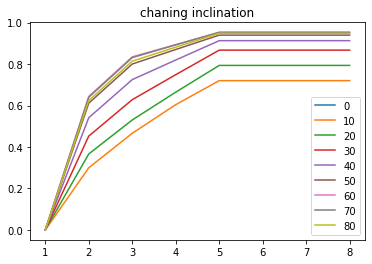

In [60]:
import matplotlib.pyplot as plt
for i in [0,10,20,30,40,50,60,70,80]:
    subset = sample_results[sample_results['inclination'] < i]
    erass_columns = subset[['eRASS1', 'eRASS2', 'eRASS3', 'eRASS4', 'eRASS5', 'eRASS6', 'eRASS7','eRASS8']]
    N_transient = len(erass_columns)
    plt.plot([1,2,3,4,5,6,7,8], erass_columns.sum()/N_transient, label=i)
    print(f'i < {i} | N_transient = {N_transient}')
plt.legend()
plt.title('chaning inclination')

dincl<10, N_transient=4860
dincl<20, N_transient=20520
dincl<30, N_transient=46980
dincl<40, N_transient=84053
dincl<45, N_transient=105892


Text(0.5, 1.0, 'chaning dincl')

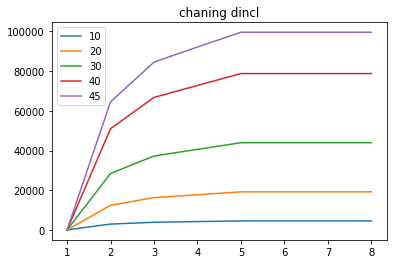

In [61]:
import matplotlib.pyplot as plt

for i in [10,20,30,40,45]:
    subset = sample_results[sample_results['dincl'] < i]
    erass_columns = subset[['eRASS1', 'eRASS2', 'eRASS3', 'eRASS4', 'eRASS5', 'eRASS6', 'eRASS7', 'eRASS8']]
    N_transient = len(erass_columns)
    plt.plot([1,2,3,4,5,6,7,8], erass_columns.sum(), label=i)
    print(f'dincl<{i}, N_transient={N_transient}')
plt.legend()
plt.title('chaning dincl')

dincl < 10 N_alive: 59470 N_transient: 4860
dincl < 20 N_alive: 106156 N_transient: 20520
dincl < 30 N_alive: 140380 N_transient: 46980
dincl < 40 N_alive: 163260 N_transient: 84053
dincl < 45 N_alive: 171072 N_transient: 105892


Text(0.5, 1.0, 'chaning dincl')

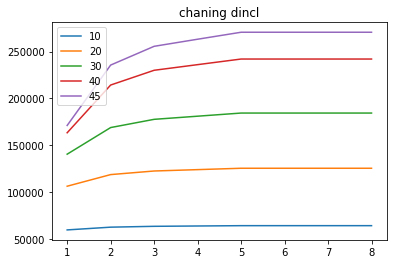

In [62]:
for i in [10,20,30,40,45]:
    subset = sample_results[sample_results['dincl'] < i]
    alive_sub = alive[alive['dincl'] < i]
    N_alive = len(alive_sub)
    erass_columns = subset[['eRASS1', 'eRASS2', 'eRASS3', 'eRASS4', 'eRASS5', 'eRASS6', 'eRASS7', 'eRASS8']]
    N_transient = len(erass_columns)
    plt.plot([1,2,3,4,5,6,7,8], erass_columns.sum()+N_alive, label=i)
    print(f'dincl < {i} N_alive: {N_alive} N_transient: {N_transient}')
plt.legend()
plt.title('chaning dincl')

Text(0, 0.5, 'eRASS4')

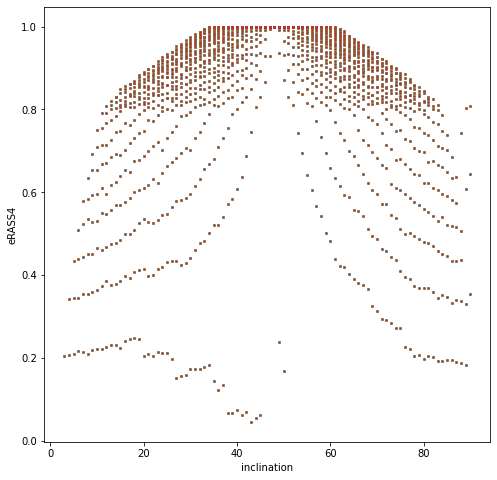

In [63]:
plt.figure(figsize=(8,8))
cycle = 'eRASS4'
for id in sample_results['system_id'].unique():
    sub = sample_results[sample_results['system_id']==74]
    plt.scatter(sub['inclination'], sub[cycle], s=0.5)
plt.xlabel('inclination')
plt.ylabel(cycle)

In [64]:
sample_results['system_id'].unique()

array([  27,   40,   53,   56,   74,   82,  133,  148,  178,  199,  206,
        207,  239,  250,  269,  279,  283,  310,  315,  437,  503,  546,
        547,  559,  560,  615,  621,  764,  804,  894,  907,  917,  944,
        952, 1032, 1071, 1086, 1102, 1135, 1137, 1178, 1226, 1255, 1343,
       1477, 1485, 1499, 1537, 1607, 1641, 1662, 1717, 2937, 3796])

Text(0, 0.5, 'P(det_as_transient) eRASS3')

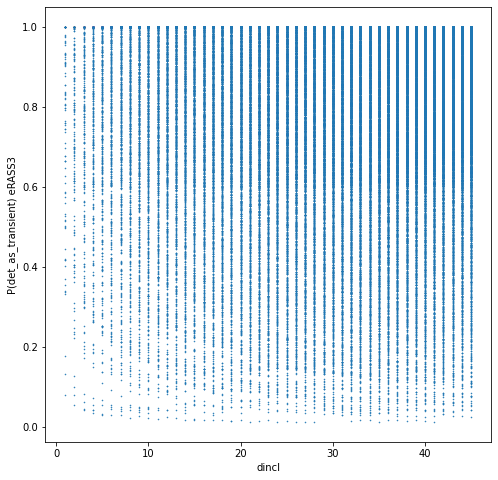

In [65]:
plt.figure(figsize=(8,8))
cycle = 'eRASS3'
plt.scatter(sample_results['dincl'], sample_results[cycle], s=0.3)
plt.xlabel('dincl')
plt.ylabel('P(det_as_transient) '+cycle)

In [66]:
sys27 = sample_results[sample_results['system_id'] == 27]

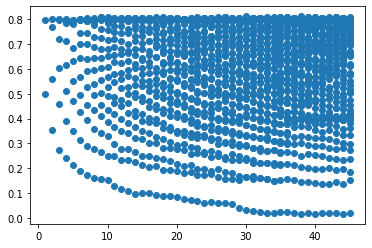

In [67]:
plt.scatter(sys27['dincl'], sys27['eRASS2'])

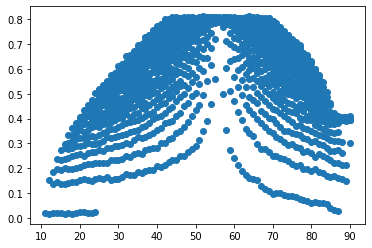

In [68]:
plt.scatter(sys27['inclination'], sys27['eRASS2'])

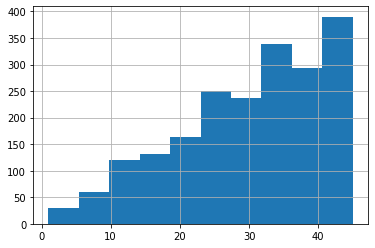

In [69]:
sys27['dincl'].hist()

In [70]:
sample_results

,curve_id,eRASS1,eRASS2,eRASS3,eRASS4,eRASS5,eRASS6,eRASS7,eRASS8,dincl,inclination,system_id
0,4333,0.0,0.7977,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1,56,27
1,4334,0.0,0.4984,0.6977,0.8489,1.0000,1.0000,1.0000,1.0000,1,57,27
2,4423,0.0,0.5610,0.7573,0.8767,1.0000,1.0000,1.0000,1.0000,2,55,27
3,4424,0.0,0.8002,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2,56,27
4,4425,0.0,0.7668,0.9716,0.9872,1.0000,1.0000,1.0000,1.0000,2,57,27
...,...,...,...,...,...,...,...,...,...,...,...,...
110452,506499,0.0,0.2759,0.4149,0.5583,0.6964,0.6964,0.6964,0.6964,45,84,3796
110453,506500,0.0,0.2472,0.3718,0.4973,0.6238,0.6238,0.6238,0.6238,45,85,3796
110454,506501,0.0,0.2021,0.3045,0.4086,0.5049,0.5049,0.5049,0.5049,45,86,3796
110455,506502,0.0,0.1498,0.2261,0.3021,0.3811,0.3811,0.3811,0.3811,45,87,3796


/home/x1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


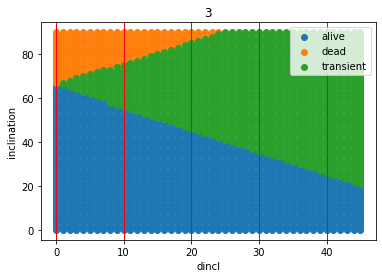

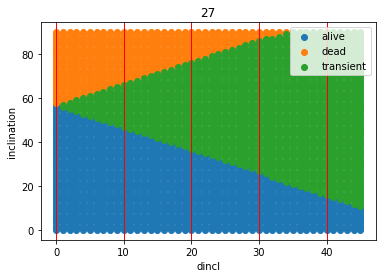

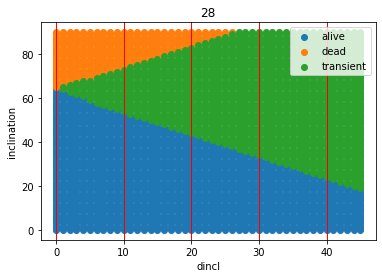

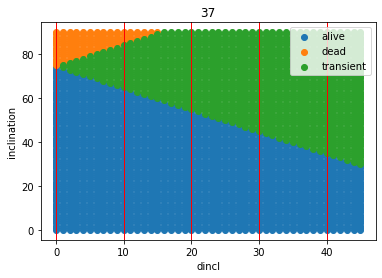

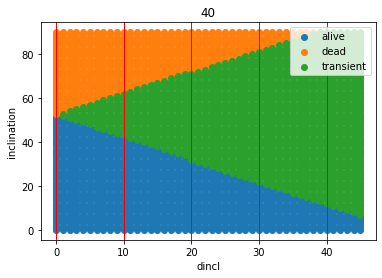

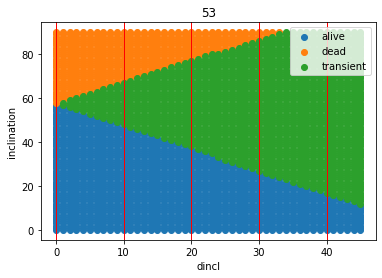

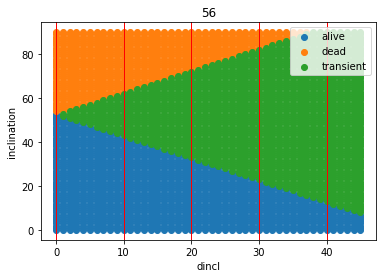

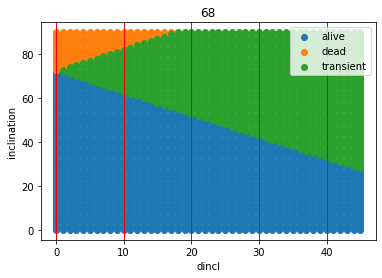

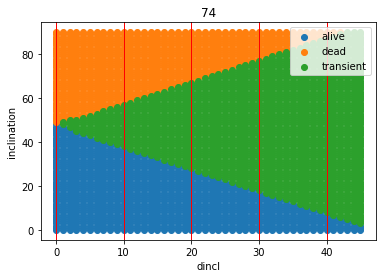

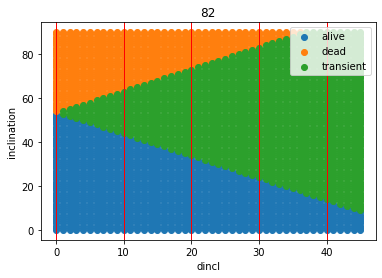

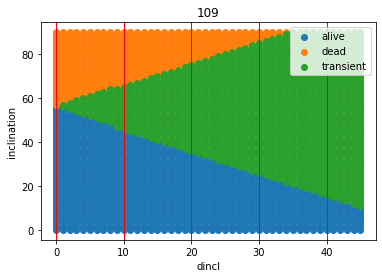

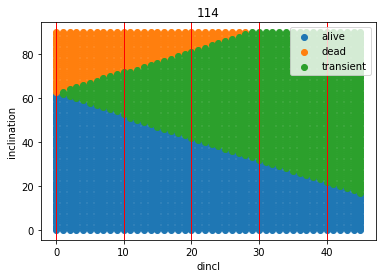

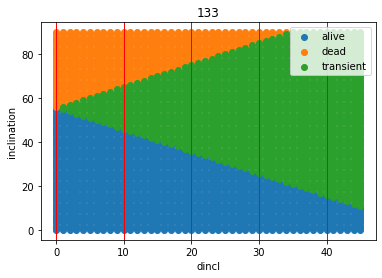

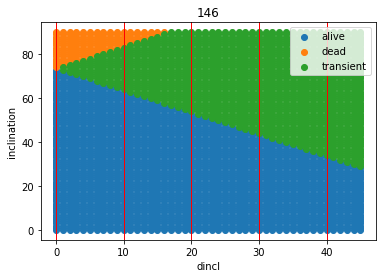

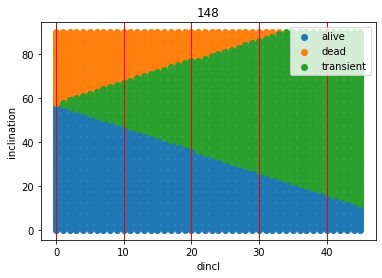

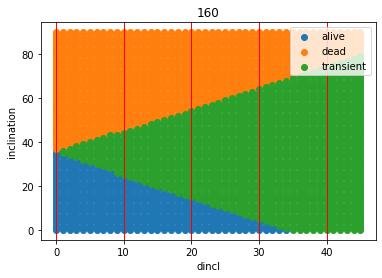

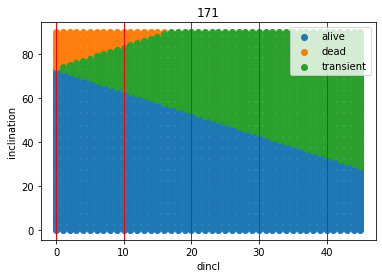

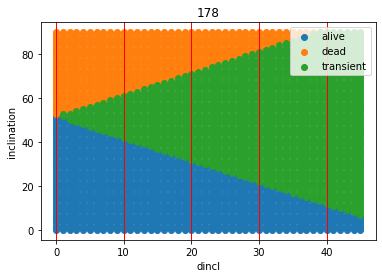

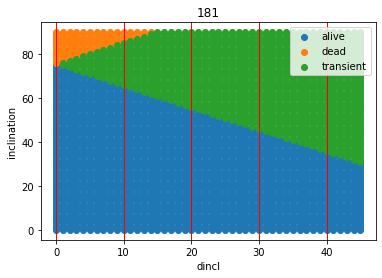

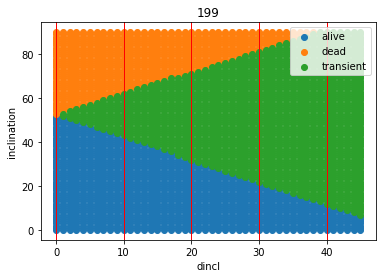

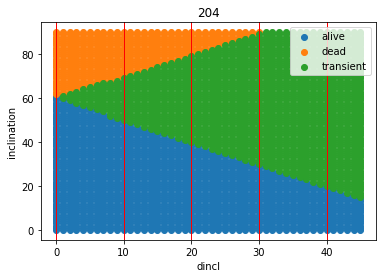

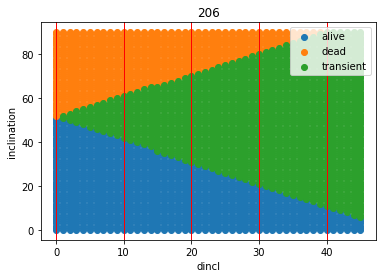

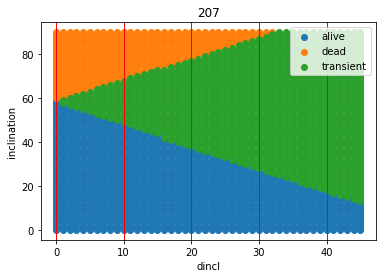

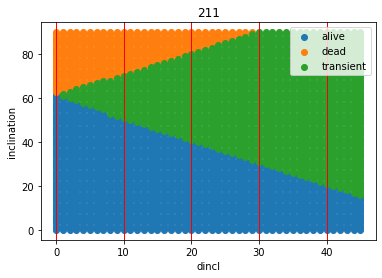

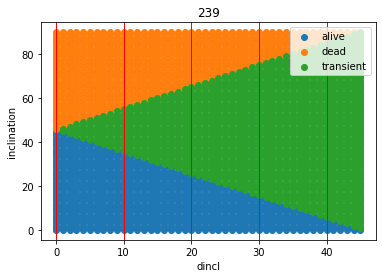

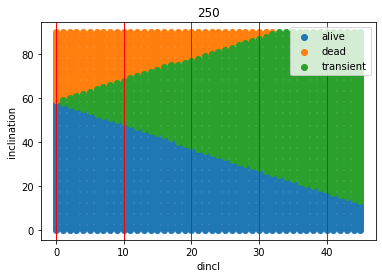

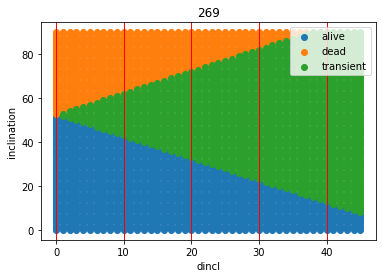

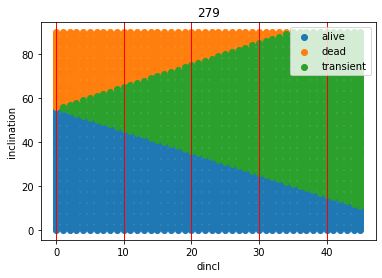

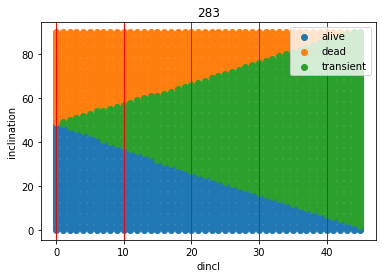

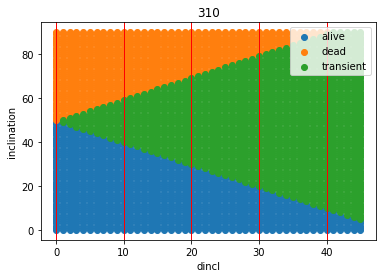

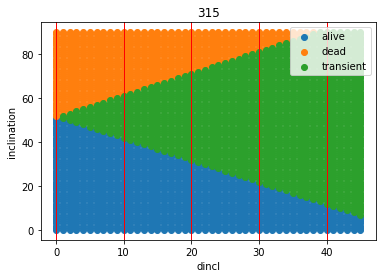

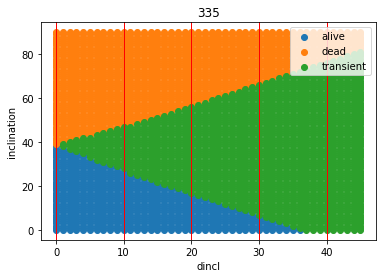

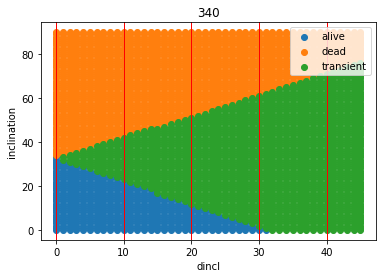

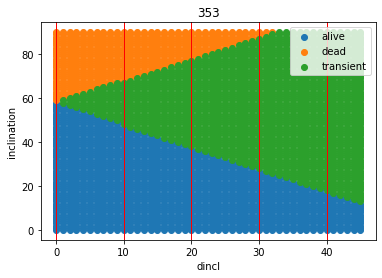

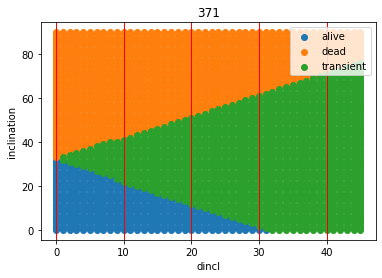

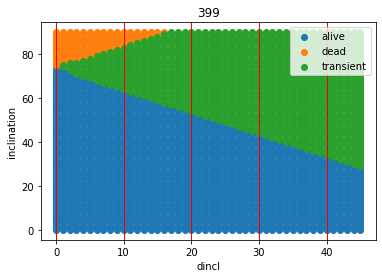

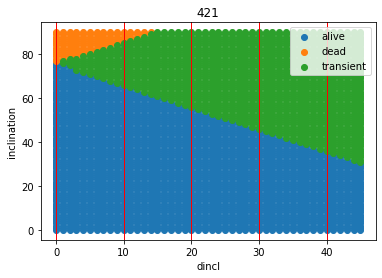

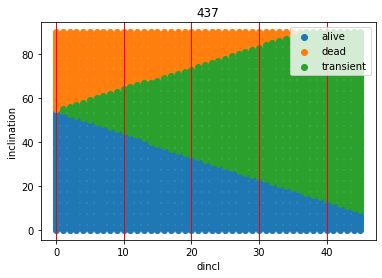

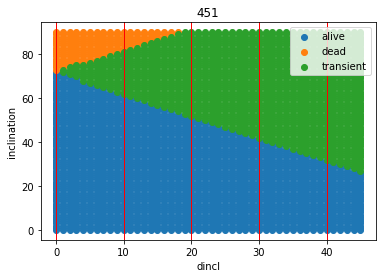

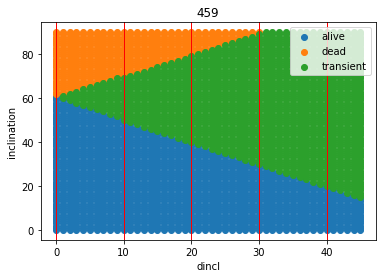

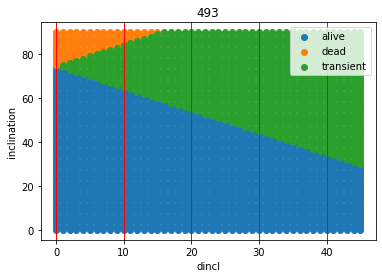

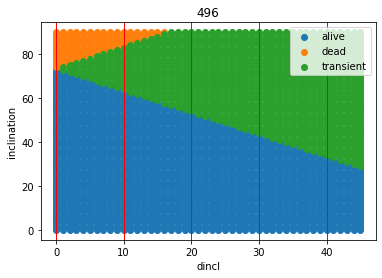

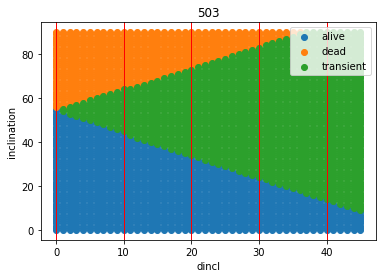

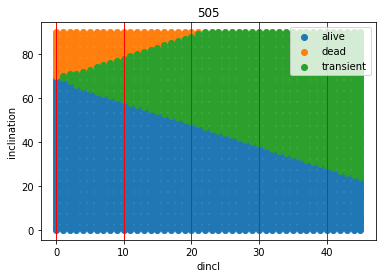

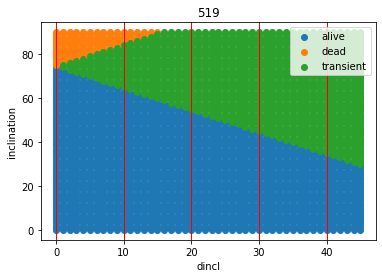

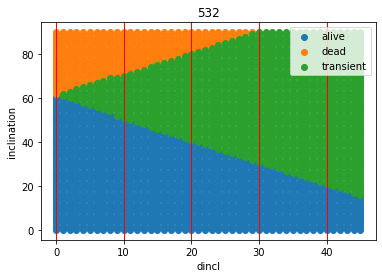

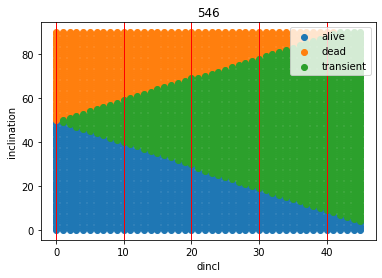

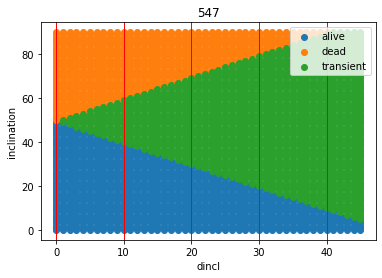

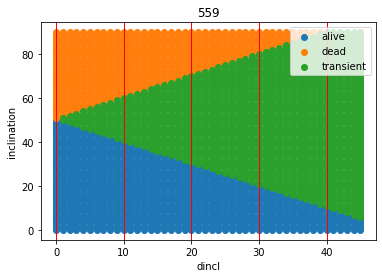

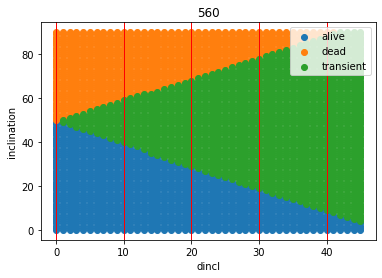

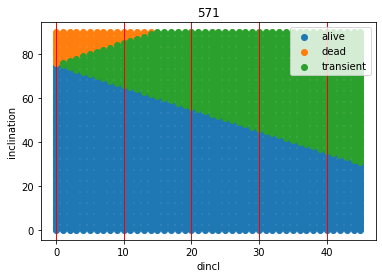

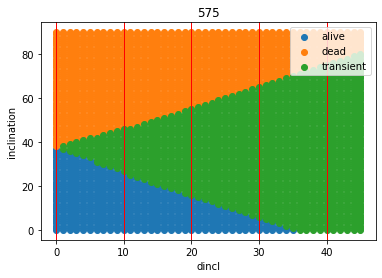

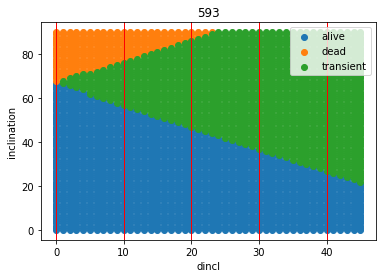

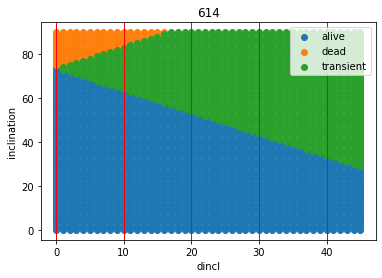

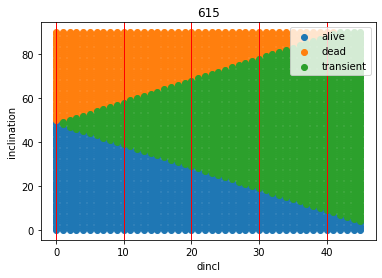

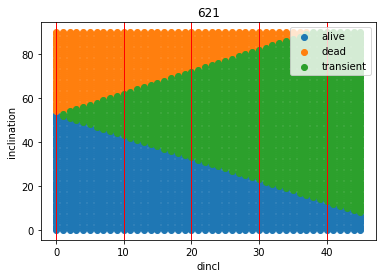

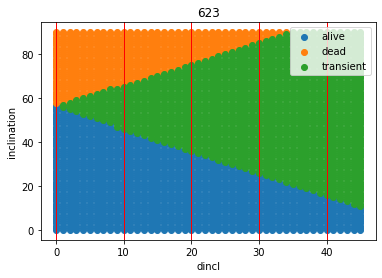

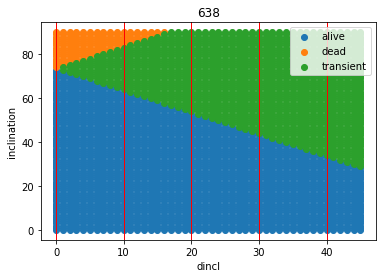

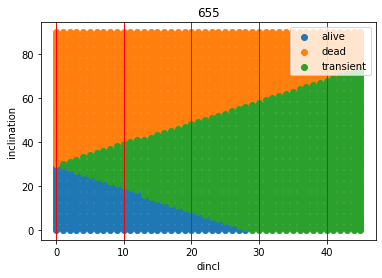

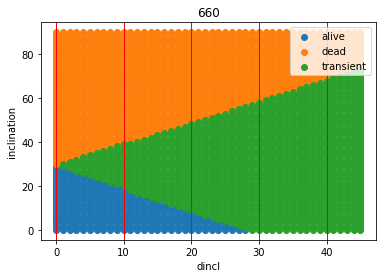

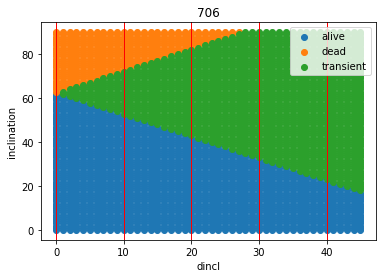

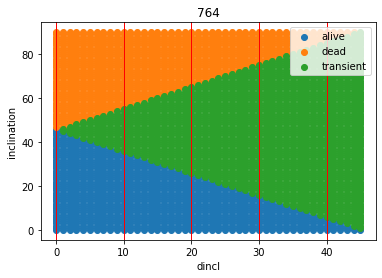

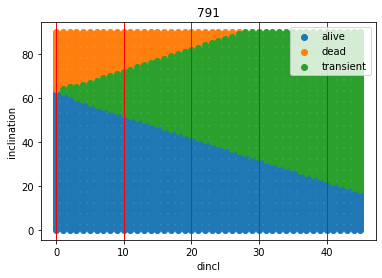

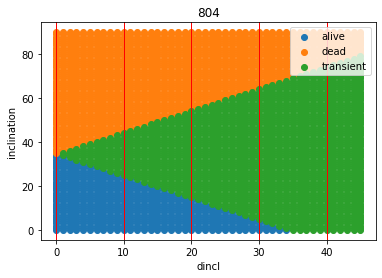

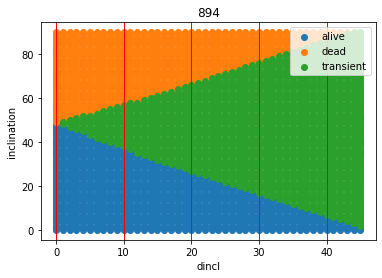

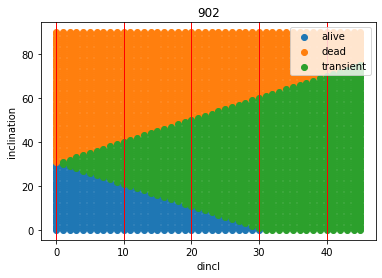

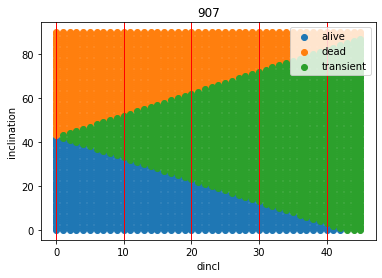

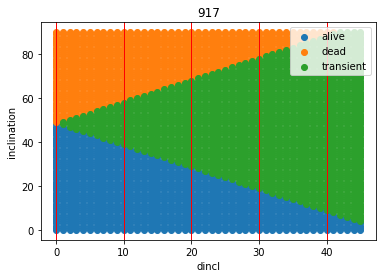

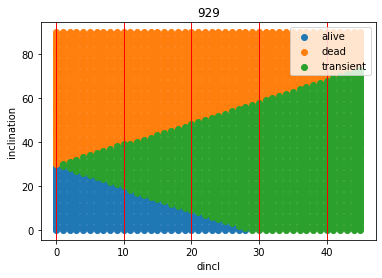

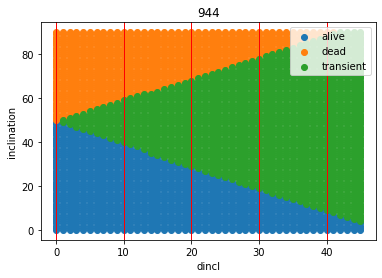

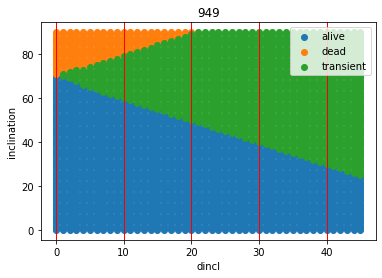

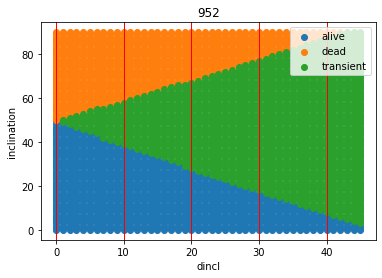

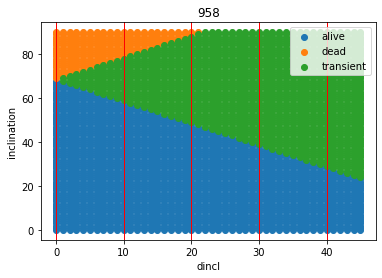

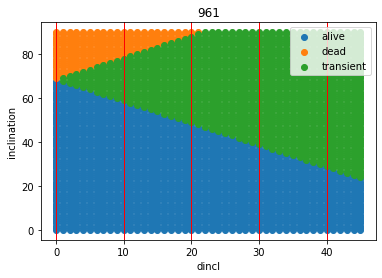

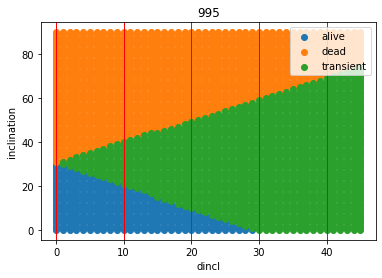

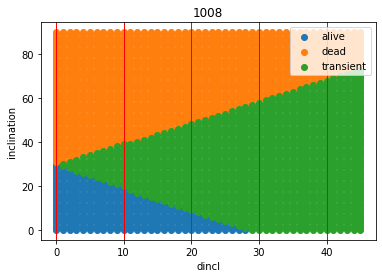

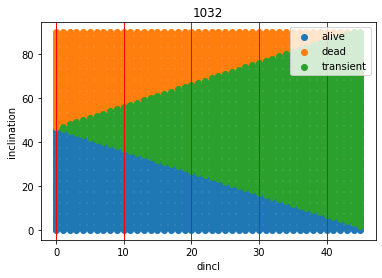

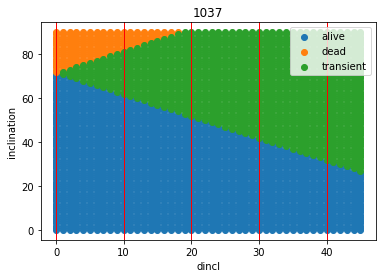

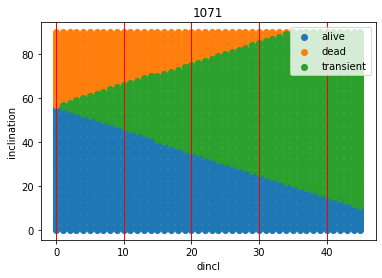

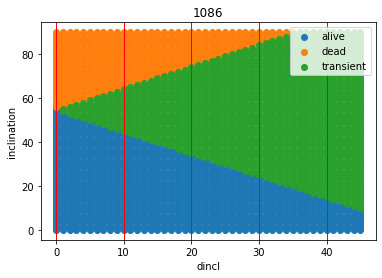

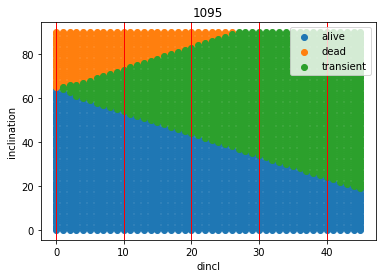

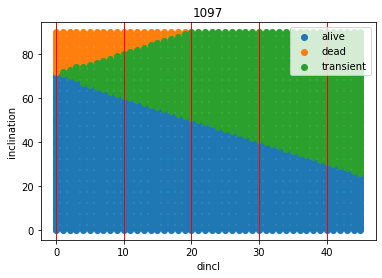

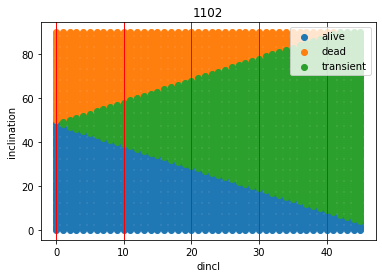

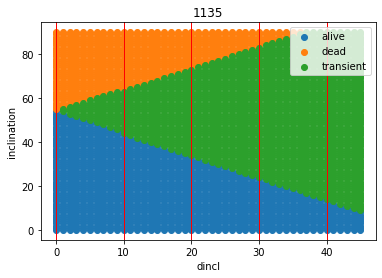

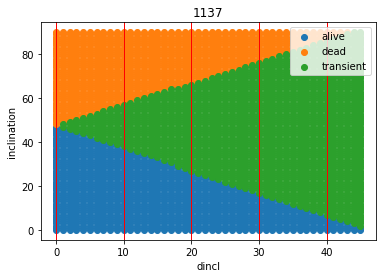

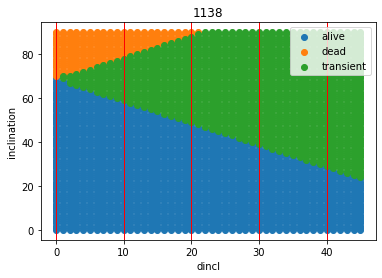

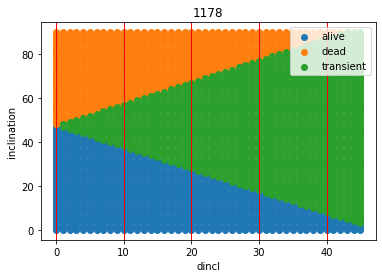

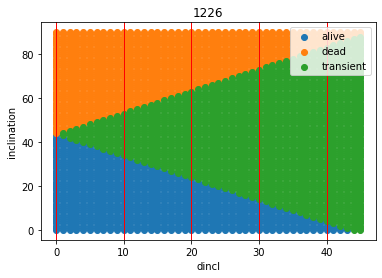

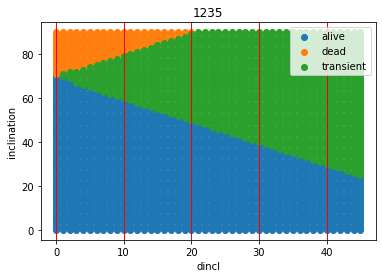

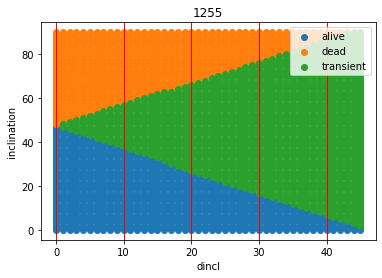

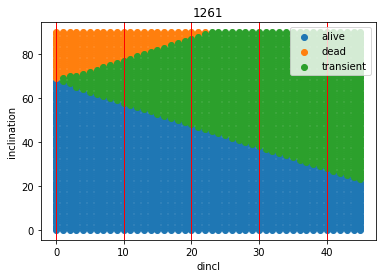

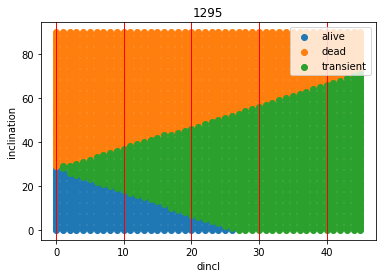

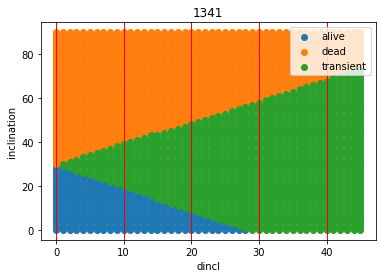

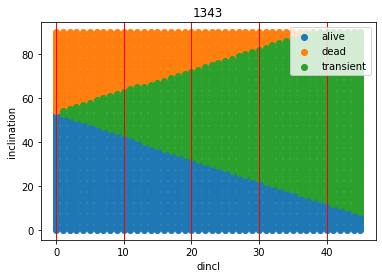

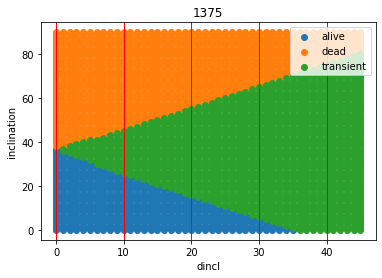

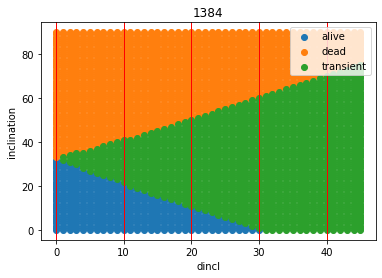

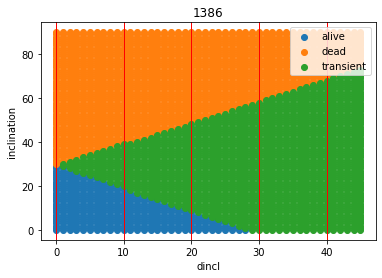

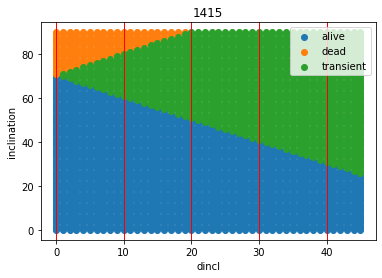

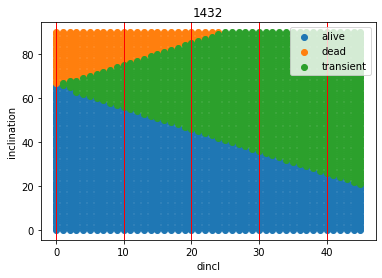

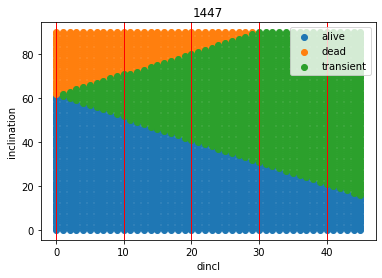

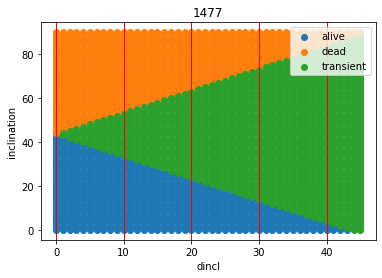

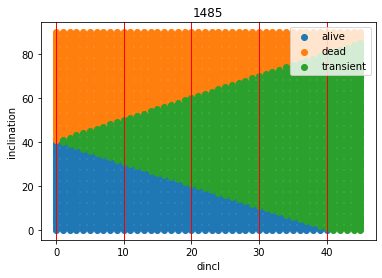

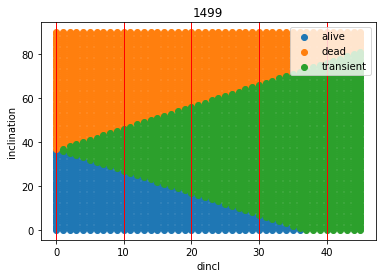

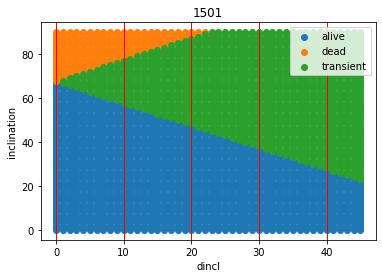

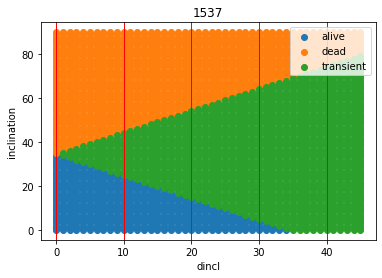

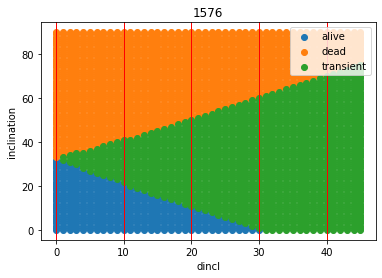

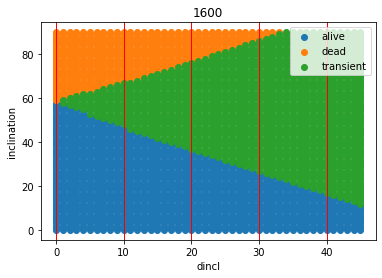

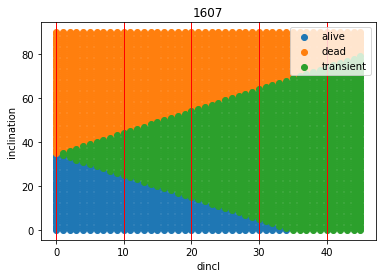

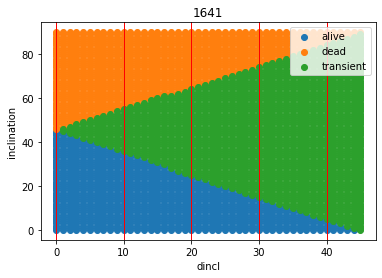

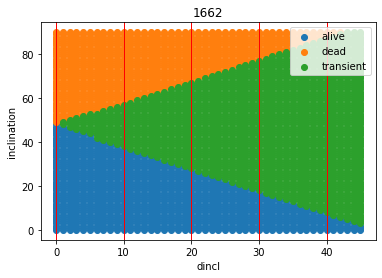

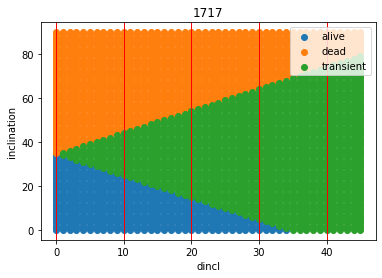

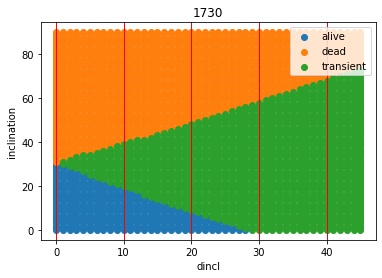

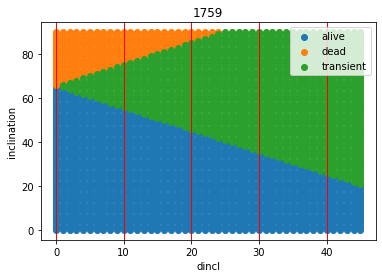

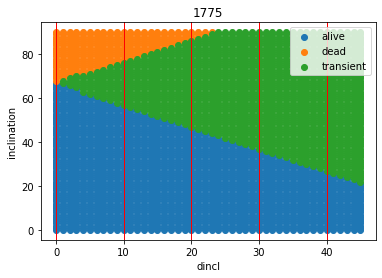

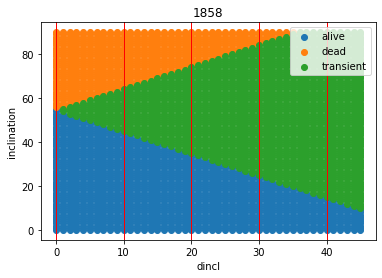

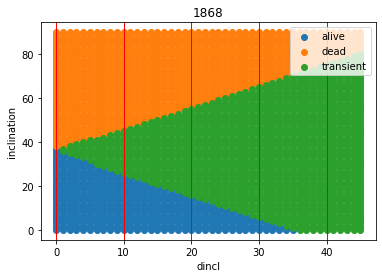

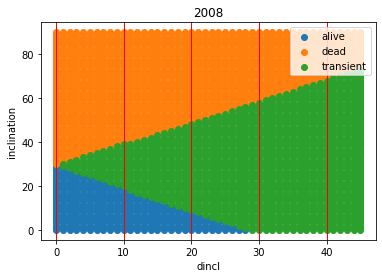

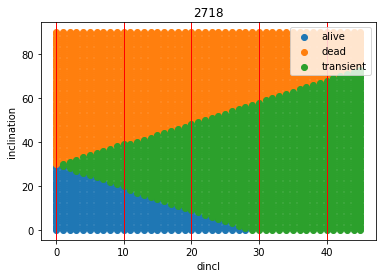

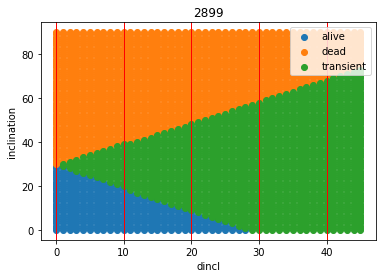

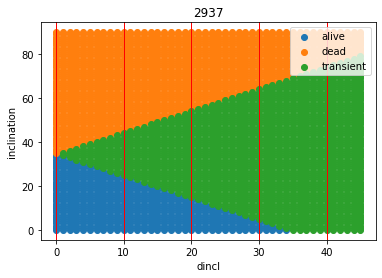

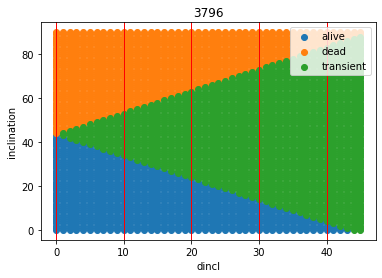

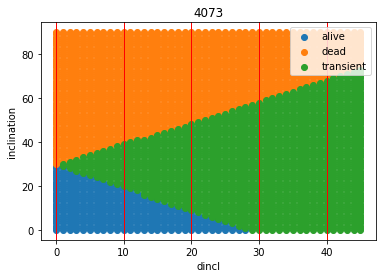

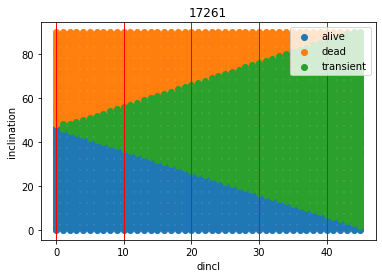

In [297]:

for system_id in curve_classifications['system_id'].unique():
    plt.figure()
    plt.title(system_id)
    plt.xlabel('dincl')
    plt.ylabel('inclination')
    sys_cc = curve_classifications[curve_classifications['system_id'] == system_id]
    for c in sys_cc['classification'].unique():
        sub = sys_cc[sys_cc['classification'] == c]
        for x0 in [0,10,20,30,40]: plt.axvline(x=x0, c='r', linewidth=0.8)
            
        plt.scatter(sub['dincl'], sub['inclination'], label=c)
    plt.legend()

In [305]:
system_classification_count = pd.DataFrame()

for system_id in curve_classifications['system_id'].unique():
    sys_cc = curve_classifications[curve_classifications['system_id'] == system_id]
    system_classification_count = system_classification_count.append(sys_cc['classification'].value_counts().rename(system_id))
    
system_classification_count['total'] = system_classification_count['alive'] + system_classification_count['dead'] + system_classification_count['transient']

In [309]:
system_classification_count

,alive,dead,transient,total
3,2009.0,317.0,1860.0,4186.0
27,1574.0,597.0,2015.0,4186.0
28,1914.0,373.0,1899.0,4186.0
37,2415.0,136.0,1635.0,4186.0
40,1377.0,760.0,2049.0,4186.0
...,...,...,...,...
2899,446.0,1806.0,1934.0,4186.0
2937,630.0,1541.0,2015.0,4186.0
3796,990.0,1127.0,2069.0,4186.0
4073,448.0,1804.0,1934.0,4186.0


,alive,dead,transient
3,1128.0,988.0,2070.0


In [207]:
def filter_by_dincl(df, dincl):
    df_new = df[df['dincl'] < dincl]
    return df_new

def filter_by_system_id(df, system_id):
    df_new = df[df['system_id'] == system_id]
    return df_new

def plot_erass_curves(curve_classifications, erass_sample):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    ax[0].set_title('only transients')
    ax[0].set_xlabel('eRASS cycle')
    ax[0].set_ylabel('number of transient detections')
    ax[1].set_xlabel('eRASS cycle')
    ax[1].set_ylabel('number of alive detections')
    ax[1].set_title('transients + alive')

    for dincl_cut in [45, 30, 15, 10, 5]:
        cc = filter_by_dincl(curve_classifications, dincl_cut)
        erass = filter_by_dincl(erass_sample, dincl_cut)

        for system_id in parent_population['system_id'].unique():
            sys_cc = filter_by_system_id(cc, system_id)
            sys_erass = filter_by_system_id(erass, system_id)

            sys_cc_alive = sys_cc[sys_cc['classification'] == 'alive']
            sys_cc_dead = sys_cc[sys_cc['classification'] == 'dead']
            sys_cc_transient = sys_cc[sys_cc['classification'] == 'transient']

            N_total = len(sys_cc)
            N_alive = len(sys_cc_alive)
            N_dead = len(sys_cc_dead)
            N_transient = len(sys_cc_transient)
    
            # ax[0].plot([1,2,3,4,5,6,7,8], (sys_erass[erass_cols].sum())/N_total, label=system_id)
            # ax[1].plot([1,2,3,4,5,6,7,8], (N_alive+sys_erass[erass_cols].sum())/N_total, label=system_id)
            
            ax[0].plot([1,2,3,4,5,6,7,8], (sys_erass[erass_cols].sum()), label=system_id)
            ax[1].plot([1,2,3,4,5,6,7,8], (N_alive+sys_erass[erass_cols].sum()), label=system_id)

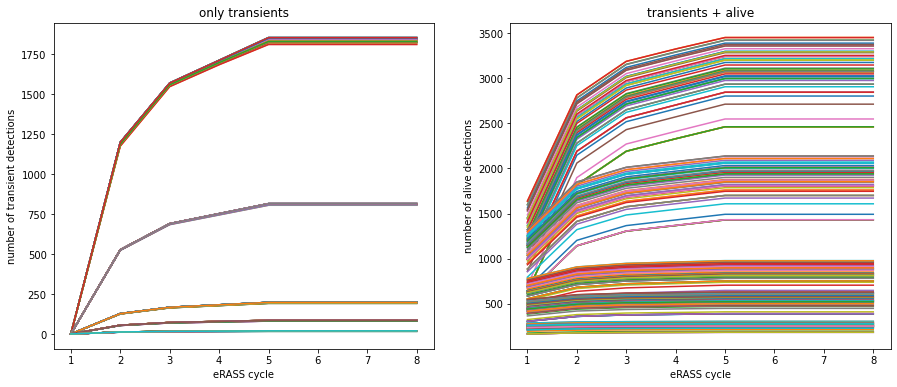

In [208]:
plot_erass_curves(curve_classifications, erass_sample)

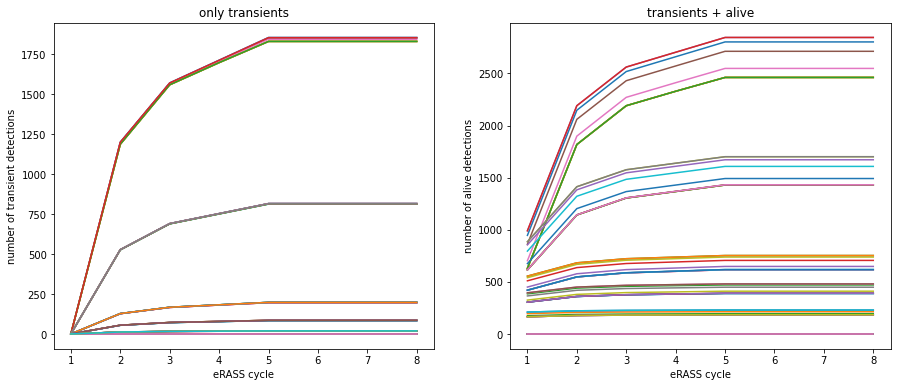

In [209]:
#NS ONLY
is_bh = False
cc = curve_classifications[curve_classifications['is_bh'] == is_bh]
erass = erass_sample[erass_sample['is_bh'] == is_bh ]
plot_erass_curves(cc, erass)

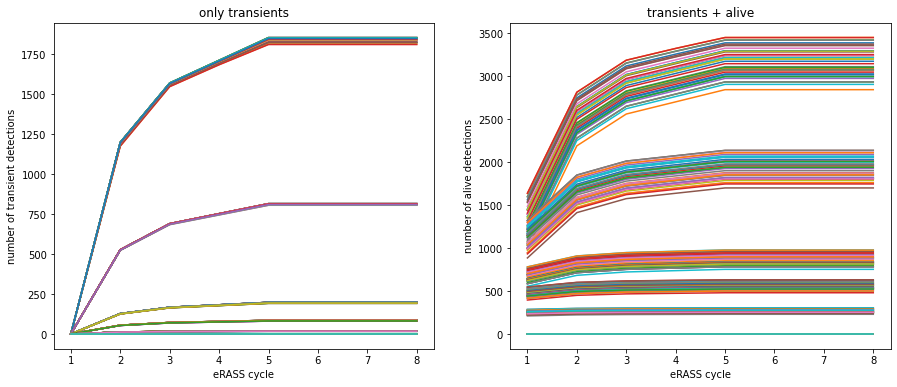

In [210]:
#BH ONLY
is_bh = True
cc = curve_classifications[curve_classifications['is_bh'] == is_bh]
erass = erass_sample[erass_sample['is_bh'] == is_bh ]
plot_erass_curves(cc, erass)

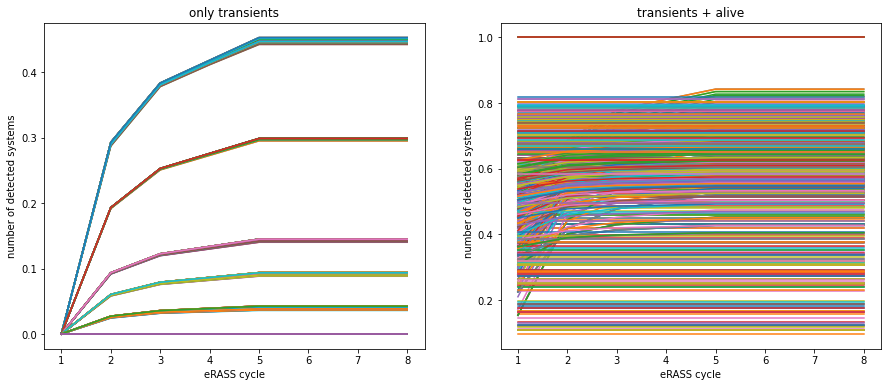

In [211]:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    ax[0].set_title('only transients')
    ax[0].set_xlabel('eRASS cycle')
    ax[0].set_ylabel('number of detected systems')
    ax[1].set_xlabel('eRASS cycle')
    ax[1].set_ylabel('number of detected systems')
    ax[1].set_title('transients + alive')

    for dincl_cut in [45, 30, 15, 10, 5]:
        cc = filter_by_dincl(curve_classifications, dincl_cut)
        erass = filter_by_dincl(erass_sample, dincl_cut)

        for system_id in df_ulx.index.unique():
            sys_cc = filter_by_system_id(cc, system_id)
            sys_erass = filter_by_system_id(erass, system_id)

            sys_cc_alive = sys_cc[sys_cc['classification'] == 'alive']
            sys_cc_dead = sys_cc[sys_cc['classification'] == 'dead']
            sys_cc_transient = sys_cc[sys_cc['classification'] == 'transient']
            
            N_total = len(sys_cc)
            N_alive = len(sys_cc_alive)
            N_dead = len(sys_cc_dead)
            N_transient = len(sys_cc_transient)
            N_transient_erass = len(sys_erass)
            
            
            #print(f'{system_id} {N_total} {N_transient} {N_transient_erass}')
            if N_total == 0:
                ax[1].plot([1,2,3,4,5,6,7,8], [1,1,1,1,1,1,1,1], label=system_id)
            else:
                ax[0].plot([1,2,3,4,5,6,7,8], (sys_erass[erass_cols].sum())/N_total, label=system_id)
                ax[1].plot([1,2,3,4,5,6,7,8], (N_alive+sys_erass[erass_cols].sum())/N_total, label=system_id)

                
            #ax[0].plot([1,2,3,4,5,6,7,8], (sys_erass[erass_cols].sum()), label=system_id)
            #ax[1].plot([1,2,3,4,5,6,7,8], (N_alive+sys_erass[erass_cols].sum()), label=system_id)

1. take total population of 920 ULXs, mix of BHs/NSs
2.	create fake parent population of 500 ULXs of given BH/NS ratio
3.	Determine how many are always on/always dead from non-beamed
4.	from beamed, draw over eRASS and determine how the number of transients increase over time
5.	Gives us alive vs transient (as function of total population demographic)
6.	Repeat for new realisations up to ~1000
7.	Repeat for dinc cut
8.	Repeat 1-7 for new BH/NS ratio


In [234]:
def create_keys(selected_systems, selected_dincls, selected_inclinations,):
    a = np.core.defchararray.add(selected_systems.astype(str), '-')
    b = np.core.defchararray.add(selected_dincls.astype(str), '-')
    keys = np.core.defchararray.add(a,b)
    keys = np.core.defchararray.add(keys,selected_inclinations.astype(str))
    return keys

In [235]:
def sample_by_bh_ratio(systems_df, bh_ratio, n):
    ns_ratio = 1 - bh_ratio
    
    ns_systems = systems_df[systems_df['is_bh']==0].index
    bh_systems = systems_df[systems_df['is_bh']==1].index
    
    bh_weights = [bh_ratio/len(bh_systems)]*len(bh_systems)
    ns_weights = [ns_ratio/len(ns_systems)]*len(ns_systems)
    selected_systems = np.random.choice([*bh_systems, *ns_systems], size=n, p=[*bh_weights, *ns_weights])
    return selected_systems

In [236]:
def create_classification_dict():
    # Classication dict
    keys = (curve_classifications['system_id'].astype(str) +
            '-' + curve_classifications['dincl'].astype(str) +
            '-' + curve_classifications['inclination'].astype(str)).values
    classications = curve_classifications['classification'].values
    class_dict = dict(zip(keys,classications))
    return class_dict

class_dict = create_classification_dict()

In [237]:
class_dict

{'3-0-0': 'alive',
 '3-0-1': 'alive',
 '3-0-2': 'alive',
 '3-0-3': 'alive',
 '3-0-4': 'alive',
 '3-0-5': 'alive',
 '3-0-6': 'alive',
 '3-0-7': 'alive',
 '3-0-8': 'alive',
 '3-0-9': 'alive',
 '3-0-10': 'alive',
 '3-0-11': 'alive',
 '3-0-12': 'alive',
 '3-0-13': 'alive',
 '3-0-14': 'alive',
 '3-0-15': 'alive',
 '3-0-16': 'alive',
 '3-0-17': 'alive',
 '3-0-18': 'alive',
 '3-0-19': 'alive',
 '3-0-20': 'alive',
 '3-0-21': 'alive',
 '3-0-22': 'alive',
 '3-0-23': 'alive',
 '3-0-24': 'alive',
 '3-0-25': 'alive',
 '3-0-26': 'alive',
 '3-0-27': 'alive',
 '3-0-28': 'alive',
 '3-0-29': 'alive',
 '3-0-30': 'alive',
 '3-0-31': 'alive',
 '3-0-32': 'alive',
 '3-0-33': 'alive',
 '3-0-34': 'alive',
 '3-0-35': 'alive',
 '3-0-36': 'alive',
 '3-0-37': 'alive',
 '3-0-38': 'alive',
 '3-0-39': 'alive',
 '3-0-40': 'alive',
 '3-0-41': 'alive',
 '3-0-42': 'alive',
 '3-0-43': 'alive',
 '3-0-44': 'alive',
 '3-0-45': 'alive',
 '3-0-46': 'alive',
 '3-0-47': 'alive',
 '3-0-48': 'alive',
 '3-0-49': 'alive',
 '3-0-50':

In [287]:
sample_size = 500
bh_ratio = 0.5

selected_systems       = sample_by_bh_ratio(df_ulx, bh_ratio, sample_size)
selected_dincls        = np.random.randint(0,46, size=sample_size)
selected_inclinations  = np.random.randint(0,91, size=sample_size)
selected_keys          = create_keys(selected_systems, selected_dincls, selected_inclinations)
selected_classications = [class_dict.get(key) for key in selected_keys]


N_total     = sample_size
N_alive     = selected_classications.count('alive') + selected_classications.count(None) #None --> no lightcurve --> alive
N_transient = selected_classications.count('transient')
N_dead      = selected_classications.count('dead')

if N_alive + N_transient + N_dead != N_total:
    print('sum of classifications != number of inputs')


for i in range(sample_size):
        classification = selected_classications[i]

        if classification == 'transient':
            sys_id = selected_systems[i]
            dincl = selected_dincls[i]
            inclination = selected_inclinations[i]
            
            system_erass =  erass_sample[(erass_sample['system_id'] == sys_id)
                         & (erass_sample['dincl'] == dincl)
                         & (erass_sample['inclination'] == inclination)]
            
            if len(system_erass) == 0:
                print(f'transient system not simulated for eRASS')
            else:
                print(system_erass)
                
    

transient system not simulated for eRASS
transient system not simulated for eRASS
transient system not simulated for eRASS
transient system not simulated for eRASS
transient system not simulated for eRASS
        curve_id  eRASS1  eRASS2  eRASS3  eRASS4  eRASS5  eRASS6  eRASS7  \
107514    501248     0.0  0.7209  0.9202  0.9583     1.0     1.0     1.0   

        eRASS8  dincl  inclination  system_id  is_bh  
107514     1.0     34           20       2937      0  
transient system not simulated for eRASS
       curve_id  eRASS1  eRASS2  eRASS3  eRASS4  eRASS5  eRASS6  eRASS7  \
92783    425203     0.0  0.7181  0.9234  0.9633     1.0     1.0     1.0   

       eRASS8  dincl  inclination  system_id  is_bh  
92783     1.0     26           51       1485      0  
       curve_id  eRASS1  eRASS2  eRASS3  eRASS4  eRASS5  eRASS6  eRASS7  \
96683    437389     0.0  0.7517  0.9554  0.9786     1.0     1.0     1.0   

       eRASS8  dincl  inclination  system_id  is_bh  
96683     1.0     22       

,curve_id,eRASS1,eRASS2,eRASS3,eRASS4,eRASS5,eRASS6,eRASS7,eRASS8,dincl,inclination,system_id,is_bh


In [261]:
class_dict

{'3-0-0': 'alive',
 '3-0-1': 'alive',
 '3-0-2': 'alive',
 '3-0-3': 'alive',
 '3-0-4': 'alive',
 '3-0-5': 'alive',
 '3-0-6': 'alive',
 '3-0-7': 'alive',
 '3-0-8': 'alive',
 '3-0-9': 'alive',
 '3-0-10': 'alive',
 '3-0-11': 'alive',
 '3-0-12': 'alive',
 '3-0-13': 'alive',
 '3-0-14': 'alive',
 '3-0-15': 'alive',
 '3-0-16': 'alive',
 '3-0-17': 'alive',
 '3-0-18': 'alive',
 '3-0-19': 'alive',
 '3-0-20': 'alive',
 '3-0-21': 'alive',
 '3-0-22': 'alive',
 '3-0-23': 'alive',
 '3-0-24': 'alive',
 '3-0-25': 'alive',
 '3-0-26': 'alive',
 '3-0-27': 'alive',
 '3-0-28': 'alive',
 '3-0-29': 'alive',
 '3-0-30': 'alive',
 '3-0-31': 'alive',
 '3-0-32': 'alive',
 '3-0-33': 'alive',
 '3-0-34': 'alive',
 '3-0-35': 'alive',
 '3-0-36': 'alive',
 '3-0-37': 'alive',
 '3-0-38': 'alive',
 '3-0-39': 'alive',
 '3-0-40': 'alive',
 '3-0-41': 'alive',
 '3-0-42': 'alive',
 '3-0-43': 'alive',
 '3-0-44': 'alive',
 '3-0-45': 'alive',
 '3-0-46': 'alive',
 '3-0-47': 'alive',
 '3-0-48': 'alive',
 '3-0-49': 'alive',
 '3-0-50':